## Assignment 10: Apply K-Means clustering, Hierarchical Clustering, and DBSCAN to Amazon food reviews dataset [M]

Given Dataset consists of reviews of fine foods from amazon. Reviews describe (1)product and user information, (2)ratings, and (3) a plain text review.Here,  Clustering  algorithm is applied on amazon reviews datasets to cluster the reviews.

##### Types of clustering :
      1.K-Means clustering
      2.Hierarchical Clustering
      3.DBSCAN(Density Based spital clustering of application with noise).

Procedure to execute the above task is as follows:

##### 1.K-Means clustering

* **Step1: Take Reviews data of amazon reviews data-set. And Ignore polarity column**


* **Step2: Apply K-means++ cluster and K-medoids cluster algorithm.**


* **Step3: Apply  Feature generation techniques(Bow,tfidf,avg w2v,tfidfw2v)** 
  
  
* **Step4: Apply K-Means clustering  algorithm using each technique.**


* **Step5: To find Best k  using Elbow method**


* **Step6: Read the cluster reviews**



##### 2.Hierarchical Clustering

* **Step1: Take 5k Reviews sample  of amazon reviews data-set. And Ignore polarity column**


* **Step2: Apply  Feature generation techniques(Bow,tfidf,avg w2v,tfidfw2v)** 
  
  
* **Step3: Apply Hierarchical Clustering algorithm using each technique.**


* **Step4: To find Best k  using Elbow method**


* **Step5: Read the cluster reviews**


##### 3.DBSCAN

* **Step1: Take  sample of Reviews data of amazon reviews data-set. And Ignore polarity column**


* **Step2:consider min_pts = 2* dimension(consider 100 dimensions of data).**


* **Step3: Apply  Feature generation techniques(avg w2v,tfidfw2v) BOW & TFIDF is high dimesional thus DBSCAn does not work properly** 
  
  
* **Step4: Apply DBSCAN  algorithm using avg w2v & tfidfw2v technique.**


* **Step5: To find Best k  using Elbow method**


* **Step6: Read the cluster reviews**


* **Step7: As DBSCAN is sensible towards eps value,check the sensitives for different value of eps**



         

## Objective:

* To cluster Amazon reviews  using K-Means clustering, Hierarchical Clustering, and DBSCAN algorithm.Read & display the random reviews in given set of clusters using wordcloud.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# All necessary module
%matplotlib inline

#import  sys
import re
import math
import random
import pandas as pd
import numpy as np
import pickle
# modules for text processing
import nltk
import string
from tqdm import tqdm
from sklearn.externals import joblib

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.decomposition import TruncatedSVD

import pytablewriter
from sklearn.feature_extraction.text import CountVectorizer


from nltk.stem.porter import PorterStemmer

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

from sklearn import linear_model
from scipy.stats import uniform
import os
# Importing k-Means class from sklearn
from sklearn.cluster import KMeans


from sklearn.metrics import pairwise_distances

In [3]:
from kmedoids import kMedoids
# Importing Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
# DBSCAN
from sklearn.cluster import DBSCAN

In [4]:
import zipfile
archive = zipfile.ZipFile('/floyd/input/pri/Reviews.zip', 'r')
csvfile = archive.open('Reviews.csv')

In [5]:
# Reading CSV file and printing first five rows 
amz = pd.read_csv(csvfile ) # reviews.csv is  dataset file
print(amz.head(2))

   Id   ProductId          UserId ProfileName  HelpfulnessNumerator  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW  delmartian                     1   
1   2  B00813GRG4  A1D87F6ZCVE5NK      dll pa                     0   

   HelpfulnessDenominator  Score        Time                Summary  \
0                       1      5  1303862400  Good Quality Dog Food   
1                       0      1  1346976000      Not as Advertised   

                                                Text  
0  I have bought several of the Vitality canned d...  
1  Product arrived labeled as Jumbo Salted Peanut...  


In [6]:
# dimensions of dataset and columns name
print(amz.shape) 
#print(amz1.shape)
print(amz.columns)

(568454, 10)
Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')


In [7]:
print(amz.shape)
amz.head(2)


(568454, 10)


Id   ProductId          UserId ProfileName  HelpfulnessNumerator  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW  delmartian                     1   
1   2  B00813GRG4  A1D87F6ZCVE5NK      dll pa                     0   

   HelpfulnessDenominator  Score        Time                Summary  \
0                       1      5  1303862400  Good Quality Dog Food   
1                       0      1  1346976000      Not as Advertised   

                                                Text  
0  I have bought several of the Vitality canned d...  
1  Product arrived labeled as Jumbo Salted Peanut...

#### Data Pre-processing on raw data:

Every datasets contains some unwanted data.Raw data is preprocessed by removing duplication.


In [8]:
#Processing of ProductId
#Sorting data according to ProductId in ascending order
sorted_data=amz.sort_values('ProductId', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')
#sorted_data.head() # printing sorted data
# To check the duplications in raw data
dupli=sorted_data[sorted_data.duplicated(["UserId","ProfileName","Time","Text"])]
print(dupli.head(5))
# Remove Deduplication of entries
final=sorted_data.drop_duplicates(subset={"UserId","ProfileName","Time","Text"}, keep='first', inplace=False)
final.shape
#Checking to see how much % of data still remains
(final['Id'].size*1.0)/(amz['Id'].size*1.0)*100
final=final[final.HelpfulnessNumerator<=final.HelpfulnessDenominator]
#Before starting the next phase of preprocessing lets see the number of entries left
print(final.shape)



            Id   ProductId          UserId  \
171222  171223  7310172001   AJD41FBJD9010   
171153  171154  7310172001   AJD41FBJD9010   
171151  171152  7310172001   AJD41FBJD9010   
217443  217444  7310172101  A22FICU3LCG2J1   
217444  217445  7310172101  A1LQV0PSM04DWI   

                                         ProfileName  HelpfulnessNumerator  \
171222  N. Ferguson "Two, Daisy, Hannah, and Kitten"                     1   
171153  N. Ferguson "Two, Daisy, Hannah, and Kitten"                     0   
171151  N. Ferguson "Two, Daisy, Hannah, and Kitten"                     0   
217443                                      C. Knapp                     1   
217444                                 B. Feuerstein                     1   

        HelpfulnessDenominator  Score        Time  \
171222                       1      5  1233360000   
171153                       0      5  1233360000   
171151                       0      5  1233360000   
217443                       1      4  127

# Text Preprocessing:

In [9]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
 
stop = set(stopwords.words('english')) #set of stopwords
sno = nltk.stem.SnowballStemmer('english') #initialising the snowball stemmer

def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>$< /><')
    #cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned


cleaning html tags like" <.*?>" and punctuations like " r'[?|!|\'|"|#]',r''" from senetences

In [ ]:
#Code for implementing step-by-step the checks mentioned in the pre-processing phase.

'''Pre processing of text data:It is cleaning and flitering text'''
i=0
str1=' '
global final_string
final_string=[]
all_positive_words=[] 
all_negative_words=[] 
s=''
for sent in final['Text'].values:
    filtered_sentence=[]
    #print(sent);
    sent=cleanhtml(sent) # remove HTMl tags
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                if(cleaned_words.lower() not in stop):
                    s=(sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(s)
                    if (final['Score'].values)[i] == 'positive': 
                        all_positive_words.append(s) #list of all words used to describe positive reviews
                    if(final['Score'].values)[i] == 'negative':
                        all_negative_words.append(s) #list of all words used to describe negative reviews reviews
                else:
                    continue
            else:
                continue 
    #print(filtered_sentence)
    str1 = b" ".join(filtered_sentence) #final string of cleaned words
    #print("***********************************************************************")

    final_string.append(str1)
    i+=1


##### Dumping and loading  Pre processing of text data in pickle file 

In [11]:
pickle_path_final_string='final_string.pkl'
final_string_file=open(pickle_path_final_string,'wb')
pickle.dump(final_string,final_string_file)
final_string_file.close()

In [11]:
pickle_path_final_string='final_string.pkl'
final_string_unpkl=open(pickle_path_final_string,'rb')
final_string=pickle.load(final_string_unpkl)

In [12]:

final['CleanedText']=final_string
#adding a column of CleanedText which displays the data after pre-processing of the review 
Pre_Process_Data = final[['CleanedText','Time']] 


### Splitting  dataset based on Time

In [13]:
X1 = Pre_Process_Data[['CleanedText','Time']].sort_values('Time',axis=0).drop('Time',axis=1)
#40k data sample
X_Text=X1[:40000]
print(X_Text.shape)



(40000, 1)


# WordCloud function

In [14]:
from wordcloud import WordCloud, STOPWORDS 

def word_cloud_form(text_value):
    comment_words = ' '
    stopwords = set(STOPWORDS) 
    for words in text_value.decode("utf-8").split(): 
        comment_words =comment_words + words + ' '



    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='black', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(comment_words) 

    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor='y', edgecolor='w') 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 

In [15]:
# result_display  is function to convert dataframe into table format in Markdown
def result_display(df):
    writer = pytablewriter.MarkdownTableWriter()
    writer.header_list = list(df.columns.values)
    writer.value_matrix = df.values.tolist()
    writer.write_table()

# Methods to convert text into vector

Methods:
* Bag of Words
* Avg word2vec
* Tf-idf
* tf-idf weighted Word2Vec

Using above four method is used to convert text to numeric vector.

# 1. Bag of Words (BoW)

In [16]:
# truncated SVD for dimesionality reduction for 100 dimensions
svd = TruncatedSVD(n_components=100,n_iter=7)

In [17]:
def BOW(X_text_data):
    
    count_vect = CountVectorizer() #in scikit-learn
    vect_Data = count_vect.fit_transform(X_text_data.values.ravel())
    print(vect_Data .shape)
   
    
    global final_data
    Data=svd.fit_transform(vect_Data )
    
    # StandardScaler
    final_data= StandardScaler(with_mean=False).fit_transform(Data )
    print("TruncatedSVD :",final_data.shape)

In [18]:
BOW(X_Text)

(40000, 24155)
TruncatedSVD : (40000, 100)


#### Dumping & Loading Pickle file for data ( BOW )


In [19]:
#Pickle file for training data

pickle_path_BOW='X_data_BOW.pkl'
X_data_BOW=open(pickle_path_BOW,'wb')
pickle.dump(final_data ,X_data_BOW)
X_data_BOW.close()


In [20]:
pickle_path_BOW='X_data_BOW.pkl'
unpickle_path1=open(pickle_path_BOW,'rb')
final_data=pickle.load(unpickle_path1)

In [21]:

joblib.dump(final_data, 'final_data.joblib') 


['final_data.joblib']

In [22]:

final_data = joblib.load('final_data.joblib') 


# 2. Avg word2vec
Firstly, word2vec model is designed for amazon reviews using gensim module.

In [23]:
import gensim

def avgword2vec(X_text_data):
    
    list_sent=[]
    for text in tqdm(X_text_data.values.ravel()): 
        filter_text=[]
        for i in text.split():
            if(i.isalpha()):
                filter_text.append(i.lower().decode("utf-8"))
            else:
                continue 
        list_sent.append(filter_text)
        
    global w2v_model
    w2v_model=gensim.models.Word2Vec(list_sent,min_count=5,size=100, workers=4) 
    #this model is used in avg word2vec 
    words = list(w2v_model.wv.vocab)
        
    sent_vectors = []
    for sent in  tqdm(list_sent): # for each review/sentence
        sent_vec = np.zeros(100) 
        cnt_words =0 # num of words with a valid vector in the sentence/review
        for word in sent: 
            try:
                vec = w2v_model.wv[word]
                sent_vec += vec
                cnt_words += 1
            except:
                pass
        sent_vec /= cnt_words
        sent_vectors.append(sent_vec)


    # Converting Nan value to zero in sent vectors.
    Sent_Nan = np.where(np.isnan(sent_vectors), 0, sent_vectors)
    # converting sent list to nd array
    global  Sent_final_vector
    Sent_final_vector = np.asarray(Sent_Nan )
    print(type(Sent_final_vector))

    


    

In [24]:
avgword2vec(X_Text)

100%|██████████| 40000/40000 [00:06<00:00, 5816.25it/s]


<class 'numpy.ndarray'>


#### Dumping & Loading Pickle file for  Avg word2vec

In [25]:
pickle_path_AW2V='X_data_AW2V.pkl'
X_data_AW2V=open(pickle_path_AW2V,'wb')
pickle.dump(Sent_final_vector,X_data_AW2V)
X_data_AW2V.close()


In [26]:
pickle_path_AW2V='X_data_AW2V.pkl'
unpickle_path3=open(pickle_path_AW2V,'rb')
final_w2v_count=pickle.load(unpickle_path3)


In [27]:
joblib.dump(final_w2v_count, 'final_w2v_count.joblib') 

['final_w2v_count.joblib']

In [23]:
final_w2v_count = joblib.load('final_w2v_count.joblib') 

### 3.TF-IDF 

In [29]:
def tfidf(X_text_data):
    
    tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
    final_tf_idf11 = tf_idf_vect.fit_transform(X_text_data.values.ravel())
    final_tf_idf11.get_shape()
    
    global tfidf_feat
    tfidf_feat = tf_idf_vect.get_feature_names() 
    
    global final_tfidf_np
    final_tf_idf=svd.fit_transform(final_tf_idf11 )
    print("TruncatedSVD :",final_tf_idf.shape)
    
    #StandardScaleing and normalizing for Tf-IDF
    final_tfidf_np= StandardScaler(with_mean=False).fit_transform(final_tf_idf)

    print("Train Data: ",final_tfidf_np.shape)

    global w2v_words
    w2v_words = list(w2v_model.wv.vocab)
    
    global dictionary
    dictionary = dict(zip(tf_idf_vect.get_feature_names(), list(tf_idf_vect.idf_)))


In [30]:
tfidf(X_Text)

TruncatedSVD : (40000, 100)
Train Data:  (40000, 100)


#### Dumping & Loading Pickle file for  data (TF-IDF)

In [31]:
pickle_path_tfidf='X_data_tfidf.pkl'
X_data_tfidf=open(pickle_path_tfidf,'wb')
pickle.dump(final_tfidf_np ,X_data_tfidf)
X_data_tfidf.close()

In [32]:
pickle_path_tfidf='X_data_tfidf.pkl'
unpickle_path5=open(pickle_path_tfidf,'rb')
final_tfidf_np=pickle.load(unpickle_path5)

In [33]:

joblib.dump(final_tfidf_np, 'final_tfidf_np.joblib') 


['final_tfidf_np.joblib']

In [24]:

final_tfidf_np= joblib.load('final_tfidf_np.joblib') 


#  4.TF-IDF weighted Word2Vec

In [35]:
# TF-IDF weighted Word2Vec
# Train  Word2Vec model for given  text corpus
i=0
list_of_sent=[]
for sent in tqdm(X_Text.values.ravel()):
    list_of_sent.append(sent.decode("utf-8").split())

def tfidfword2vec(X_text_data):  
        
    sent_vectors = []
    for sent in tqdm(list_of_sent): # for each review/sentence
        sent_vec = np.zeros(100) # as word vectors are of zero length
        cnt_words =0; # num of words with a valid vector in the sentence/review
        for word in sent: # for each word in a review/sentence
            if word in w2v_words:
                vec = w2v_model.wv[word]
                sent_vec += vec
                cnt_words += 1
        if cnt_words != 0:
            sent_vec /= cnt_words
        sent_vectors.append(sent_vec)


    tfidf_sent_vectors1  = np.where(np.isnan(sent_vectors), 0, sent_vectors)
    global tfidf_sent_vector_data
    tfidf_sent_vector_data  = np.asarray(tfidf_sent_vectors1 )


100%|██████████| 40000/40000 [00:00<00:00, 124916.26it/s]


In [36]:
tfidfword2vec(X_Text)

100%|██████████| 40000/40000 [00:54<00:00, 740.32it/s]


#### Dumping & Loading Pickle file forText data (TF-IDF weighted word2vec)

In [37]:
pickle_path_tfidf_weighted='X_data_tfidf_weighted.pkl'
X_data_tfidf_weighted=open(pickle_path_tfidf_weighted,'wb')
pickle.dump(tfidf_sent_vector_data  ,X_data_tfidf_weighted)
X_data_tfidf_weighted.close()

In [25]:
pickle_path_tfidf_weighted='X_data_tfidf_weighted.pkl'
unpickle_path7=open(pickle_path_tfidf_weighted,'rb')
tfidf_sent_vectors =pickle.load(unpickle_path7)

#   1.K-Means clustering

In [26]:
# Cluster range
cluster_range=list(range(2,12))

## Optimal  Cluster using Elbow Method

In [27]:
# Optimal_cluster_kmeans is function to find best k values

def Optimal_cluster_kmeans(vectorization_output,vect_name):
    
    optimal_score = []
    
    for i in tqdm(range(len(cluster_range))):
        
        
        kmeans = KMeans(n_clusters = cluster_range[i], n_jobs = -1).fit(vectorization_output)
        optimal_score.append(kmeans.inertia_) 
        
    global Optimal_cluster
    
    Optimal_cluster = np.argmin(optimal_score) + 2 # As argmin return the index of minimum loss. 
    print ("The optimal number of clusters == ", Optimal_cluster)
    print ("The loss for optimal cluster is ==  ", min(optimal_score))
    
    #plot the graph
    
    fig4 = plt.figure( facecolor='c', edgecolor='k')
    fig4.suptitle('Optimal Cluster using Elbow method '+str(vect_name), fontsize=12)       
    plt.plot(cluster_range, optimal_score,'m*',linestyle='dashed')
    plt.xlabel("Number of clusters")
    plt.ylabel("Squared Loss")
    xy = (Optimal_cluster, min(optimal_score))
    plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
    plt.grid()
    plt.show()

   

### Optimal cluster for Each Vectorization Techniques

Graph to get Optimal  Cluster using Elbow Method for Each Vectorization Techniques.

In [28]:
# All vectorization_output using BOW,avg word2vec , TFIDF and TFIDf weighted word2vec  respectively
vectorization_output=[final_data,final_w2v_count,
                      final_tfidf_np,tfidf_sent_vectors]

vect_name=['BOW','Avgword2vec','TFIDF','TFIDFweightedword2vec']

  0%|          | 0/10 [00:00<?, ?it/s]

************************************************************


BOW


************************************************************


100%|██████████| 10/10 [00:30<00:00,  3.01s/it]

The optimal number of clusters ==  11
The loss for optimal cluster is ==   3742826.6252820785


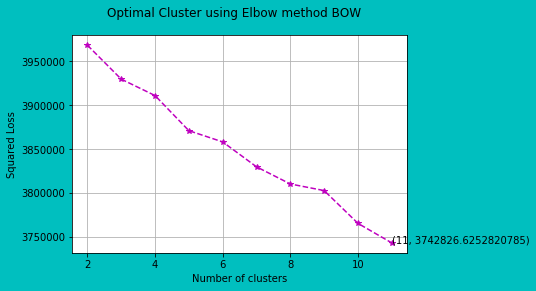

  0%|          | 0/10 [00:00<?, ?it/s]

************************************************************


Avgword2vec


************************************************************


100%|██████████| 10/10 [00:31<00:00,  3.10s/it]

The optimal number of clusters ==  11
The loss for optimal cluster is ==   201789.93882046206


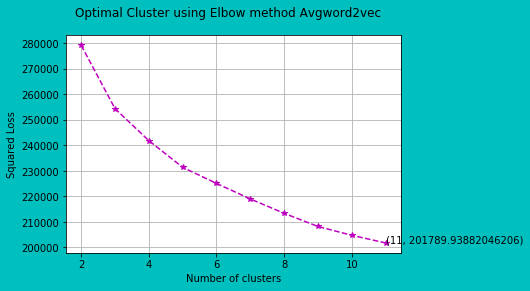

  0%|          | 0/10 [00:00<?, ?it/s]

************************************************************


TFIDF


************************************************************


100%|██████████| 10/10 [00:32<00:00,  3.27s/it]

The optimal number of clusters ==  11
The loss for optimal cluster is ==   3695239.1050974308


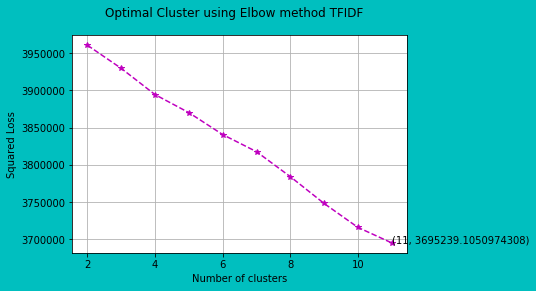

  0%|          | 0/10 [00:00<?, ?it/s]

************************************************************


TFIDFweightedword2vec


************************************************************


100%|██████████| 10/10 [00:32<00:00,  3.23s/it]

The optimal number of clusters ==  11
The loss for optimal cluster is ==   201921.27512486684


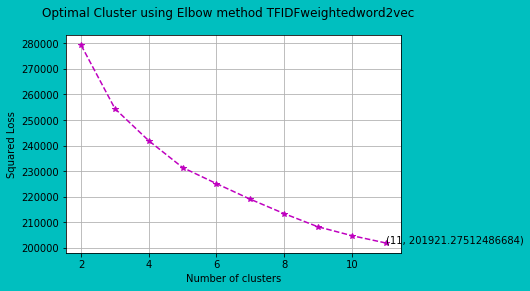

In [25]:

Optimal_cluster_vect=[]

for y in range(len(vect_name)):
            print("*" * 60)
            print("\n")
            print(vect_name[y])
            print("\n")
            print("*" * 60)
            Optimal_cluster_kmeans(vectorization_output[y],vect_name[y])
            Optimal_cluster_vect.append(Optimal_cluster)
               
            

In [26]:
Optimal_cluster_vect

[11, 11, 11, 11]

### Best model with Optimal cluster  Using Kmeans++  for Each vectorization techniques

In [27]:
# Training the best model
model_kmeans=[]
for i in tqdm(range(len(Optimal_cluster_vect))):
        print("$__$__" * 10)

        print('\n') 
        
        model = KMeans(n_clusters = Optimal_cluster_vect[i], n_jobs = -1)
        model.fit(vectorization_output[i])
        model_kmeans.append(model)
        print(str(vect_name[i])+'==',model)

  0%|          | 0/4 [00:00<?, ?it/s]

$__$__$__$__$__$__$__$__$__$__$__$__$__$__$__$__$__$__$__$__




 25%|██▌       | 1/4 [00:03<00:11,  3.86s/it]

BOW== KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=11, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
$__$__$__$__$__$__$__$__$__$__$__$__$__$__$__$__$__$__$__$__




 50%|█████     | 2/4 [00:08<00:08,  4.31s/it]

Avgword2vec== KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=11, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
$__$__$__$__$__$__$__$__$__$__$__$__$__$__$__$__$__$__$__$__




 75%|███████▌  | 3/4 [00:13<00:04,  4.46s/it]

TFIDF== KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=11, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
$__$__$__$__$__$__$__$__$__$__$__$__$__$__$__$__$__$__$__$__




100%|██████████| 4/4 [00:17<00:00,  4.45s/it]

TFIDFweightedword2vec== KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=11, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


'model_kmeans' is calualted with optimal k value for each vectorization. Optimal cluster size =11 for each vectorizied technique.

### Labels a cluster to Each  Review

 Giving Labels a cluster to each text Review. 

In [28]:
# Giving Labels a cluster to each text Review
model_col_nam=['BOW_Label','Avgword2vec','TFIDF','TFIDFword2vec']
df = X_Text
for k in tqdm(range(len(model_kmeans))):
   
        name=model_col_nam[k]
        df[name] = model_kmeans[k].labels_
df.head()  


100%|██████████| 4/4 [00:00<00:00, 18.57it/s]


CleanedText  BOW_Label  \
150523  b'witti littl book make son laugh loud recit c...          0   
150500  b'rememb see show air televis year ago child s...          0   
451855  b'beetlejuic well written movi everyth excel a...          0   
374358  b'twist rumplestiskin captur film star michael...          0   
451854  b'beetlejuic excel funni movi keaton hilari wa...          0   

        Avgword2vec  TFIDF  TFIDFword2vec  
150523            2      9              5  
150500            2      9              5  
451855            2      9              5  
374358            2      9              5  
451854            2      9              5

####  How many points belong to each cluster 

In [29]:

df1=df.groupby(['BOW_Label'])['CleanedText'].count()
df2=df.groupby(['Avgword2vec'])['CleanedText'].count()
df3=df.groupby(['TFIDF'])['CleanedText'].count()
df4=df.groupby(['TFIDFword2vec'])['CleanedText'].count()
df5=pd.concat([df1, df2,df3,df4], axis=1).replace(np.nan, 0)
df5.columns=model_col_nam

#print(df5)


In [30]:
result_display(df5)

|BOW_Label|Avgword2vec|TFIDF|TFIDFword2vec|
|--------:|----------:|----:|------------:|
|    22164|       2842| 1790|         3111|
|     3907|       4028| 1767|         4428|
|     3405|       5303|  900|         2545|
|     3072|       2329|  871|         4740|
|      245|       5213| 4426|         3544|
|     2275|       3048|  200|         7461|
|      596|       4942| 2740|         2355|
|     3216|       2446|  597|         3036|
|      708|       2934|  677|         3368|
|        1|       3968|25391|         3053|
|      411|       2947|  641|         2359|



## KMeans Cluster Bar Graph and Displaying Reviews text assigned to Random cluster for BOW vectorization

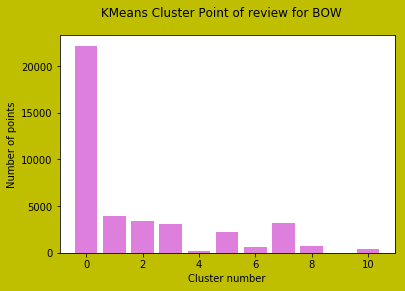

A review  cleaned text  assigned to cluster  7
************************************************************
b'say classic ive seen movi mani time actual word memor movi hilari funni time touch drama around great movi keaton excel job play odd funni pervert beetlejuic caus quit chao newli deceas coupl adam barbara let say one mean one couldv better part beetlejuic disapoint thing dvd beetljuic delet scene extra footag disapoint love movi much still worth havent seen beetlejuic must see beetlejuic lover fan must video dvd'


************************************************************


In [31]:
fig4 = plt.figure( facecolor='y', edgecolor='k')
fig4.suptitle('KMeans Cluster Point of review for BOW', fontsize=12)

plt.bar([x for x in range(Optimal_cluster_vect[0])], 
        df.groupby(['BOW_Label'])['CleanedText'].count(),
        color='m',alpha = 0.5)
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

random_cluster=random.randint(0, Optimal_cluster_vect[0])
#for i in range(Optimal_cluster_vect[0]):
print("A review  cleaned text  assigned to cluster ", random_cluster)
print("*" * 60)
text_data=df.loc[df.groupby(['BOW_Label']).groups[random_cluster][0]]['CleanedText']
print(text_data)
print('\n')
print("*" * 60)

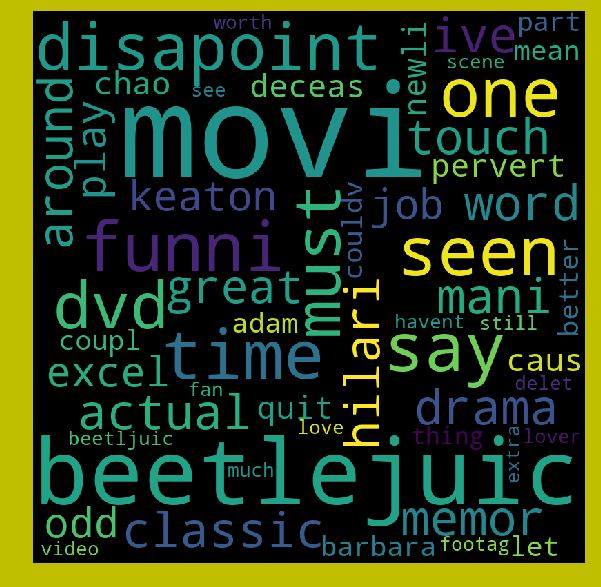

In [32]:
word_cloud_form(text_data)

* Random Cluster = 7 is about reviews which contained movie reviews which can be seen in wordcloud.
 

## KMeans Cluster Bar Graph and Displaying Reviews text assigned to Random cluster for Avgword2vec vectorization

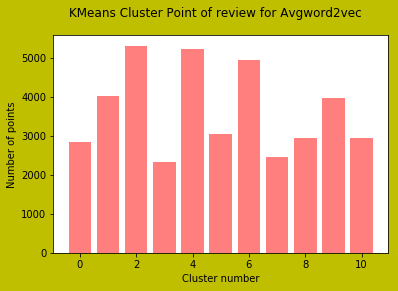

A review  cleaned text  assigned to cluster  10
************************************************************
b'easi use make mess offer vibrant color taint decort color would high recommend anyon like decor'


************************************************************


In [33]:
fig6 = plt.figure( facecolor='y', edgecolor='k')
fig6.suptitle('KMeans Cluster Point of review for Avgword2vec', fontsize=12)
plt.bar([x for x in range(Optimal_cluster_vect[1])], df.groupby(['Avgword2vec'])['CleanedText'].count(),color='r',alpha = 0.5)
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

#for i in range(Optimal_cluster):
random_cluster=random.randint(0, Optimal_cluster_vect[1])
print("A review  cleaned text  assigned to cluster ", random_cluster)
print("*" * 60)
text_data1=df.loc[df.groupby(['Avgword2vec']).groups[random_cluster][0]]['CleanedText']
print(text_data1)
print('\n')
print("*" * 60)

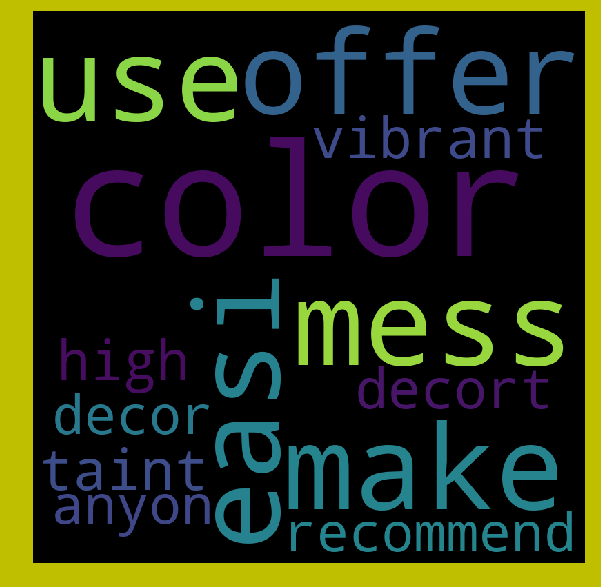

In [34]:
word_cloud_form(text_data1)

* Bar graph represents the cluster which shows counts of labelled reviews.

* Random Cluster = 10 is about reviews which contained color product (color  realted reviews)  reviews which can be seen in wordcloud.

 

## KMeans Cluster Bar Graph and Displaying Reviews text assigned to   Random cluster for TFIDF vectorization

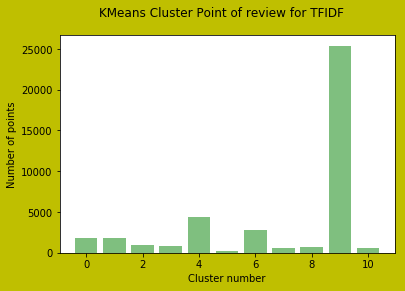

A review  cleaned text  assigned to cluster  7
************************************************************
b'lot muscl test found balein salt consist test better peopl salt salt test well alway good product theori vet give cow salt lick farmer keep cattl healthi cant afford lot medicin like bodi mani cri water also talk salt groceri store brand health food store brand test weak peopl health balanc lot water enough salt right salt'


************************************************************


In [35]:
fig7 = plt.figure( facecolor='y', edgecolor='k')
fig7.suptitle('KMeans Cluster Point of review for TFIDF', fontsize=12)
plt.bar([x for x in range(Optimal_cluster_vect[2])], df.groupby(['TFIDF'])['CleanedText'].count(),color='g',alpha = 0.5)
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

#for i in range(Optimal_cluster):
random_cluster=random.randint(0, Optimal_cluster_vect[2])
print("A review  cleaned text  assigned to cluster ", random_cluster)
print("*" * 60)
text_data2=df.loc[df.groupby(['TFIDF']).groups[random_cluster][0]]['CleanedText']
print(text_data2)
print('\n')
print("*" * 60)

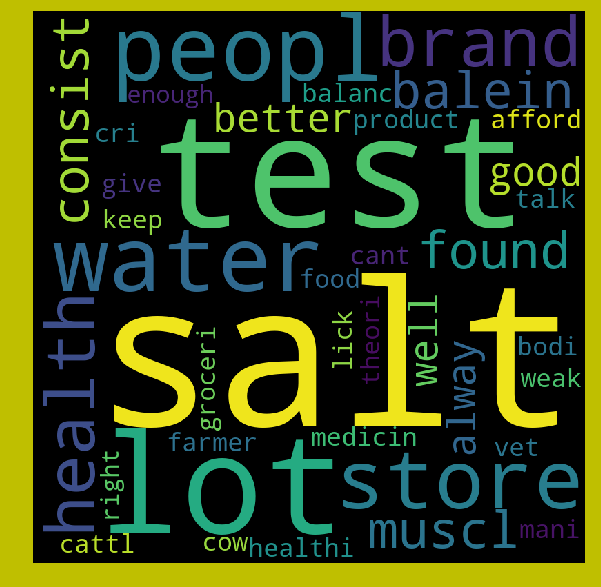

In [36]:
word_cloud_form(text_data2)

* Bar graph represents the cluster which shows counts of labelled reviews.

* Random Cluster = 7 is about reviews which contained food product (food taste realted things)  reviews which can be seen in wordcloud.

 

## KMeans Cluster Bar Graph and Displaying Reviews text assigned to each cluster for TFIDF weighted word2vec vectorization

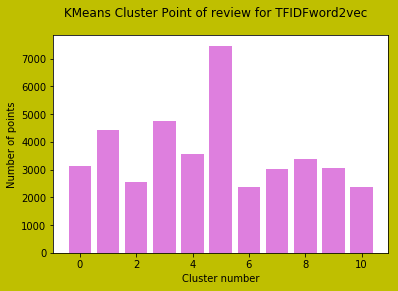

A review  cleaned text  assigned to cluster  3
************************************************************
b'much easier use wilson past color color vibrant taint frost like color simpl use make mess complaint find year ago must decor often'


************************************************************


In [37]:
fig7 = plt.figure( facecolor='y', edgecolor='k')
fig7.suptitle('KMeans Cluster Point of review for TFIDFword2vec', fontsize=12)
plt.bar([x for x in range(Optimal_cluster_vect[3])], df.groupby(['TFIDFword2vec'])['CleanedText'].count(),color='m',alpha = 0.5)
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

#for i in range(Optimal_cluster):
random_cluster=random.randint(0, Optimal_cluster_vect[2])
print("A review  cleaned text  assigned to cluster ", i)
print("*" * 60)
text_data3=df.loc[df.groupby(['TFIDFword2vec']).groups[i][0]]['CleanedText']
print(text_data3)
print('\n')
print("*" * 60)

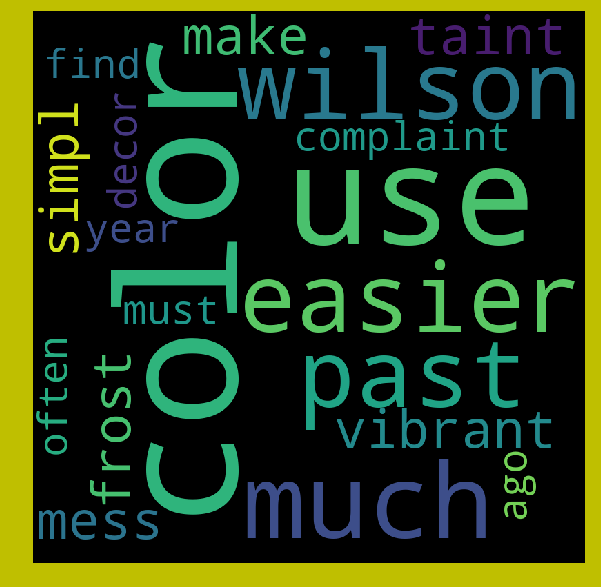

In [38]:
word_cloud_form(text_data3)

* Bar graph represents the cluster which shows counts of labelled reviews.

* Random Cluster = 3 is about reviews which is realted to supermarket praising .

### Observations for kmeans++


|BOW_Label|Avgword2vec|TFIDF|TFIDFword2vec|
|--------:|----------:|----:|------------:|
|    22164|       2842| 1790|         3111|
|     3907|       4028| 1767|         4428|
|     3405|       5303|  900|         2545|
|     3072|       2329|  871|         4740|
|      245|       5213| 4426|         3544|
|     2275|       3048|  200|         7461|
|      596|       4942| 2740|         2355|
|     3216|       2446|  597|         3036|
|      708|       2934|  677|         3368|
|        1|       3968|25391|         3053|
|      411|       2947|  641|         2359|

* Reviews which are preprocessed(cleaned Text) is clustered .And reviews in each set with given cluster number is viewd as above for each vectorization .

* Avg word2vec & tfIDF weighted word2vec are distributed review's word with equal probably manners.Each cluster contains equally distributed words for given cluster number.

* In case of BOW & TFIDF,Words distribution is unequal .For some clusters, words allocation is high while for other extremely low.

* Reviews are clustered with kmeans++ algorithm.



# KMedoids

In [39]:
# This KMedoids file is obtained from -> https://github.com/letiantian/kmedoids

 KMedoids file provided in above link is useful for python 2.7 users. For python3.6 users, some modification is need to be done. KMedoids file is rewritten with little modification.

In [29]:
vectorization_output=[final_data,final_w2v_count,final_tfidf_np,tfidf_sent_vectors]

### Computing pairwise distances.

Computing pairwise distances for each Vectorization_output and saving the results in  'D_results' .

In [30]:
# Vectorization_output

D_results=[]
vect_result=[]
for i in range(len(vectorization_output)):
    #5k reviews
    vectorization_output[i]=vectorization_output[i][:5000]
    vect_result.append(vectorization_output[i])
    D = pairwise_distances(vectorization_output[i], metric='euclidean')
    D_results.append(D)
    
    
    

#### For finding optimal value of number of clusters.

In [31]:
# For finding optimal value of number of clusters.
def compute_loss(M, C, data): # Squared Loss
    loss = 0.0
    for key, arr in C.items():
        for pos in arr:
            loss = loss + ((data[M[key]] - data[pos]).sum()) ** 2
    
    return loss

## kmedoids algorithm

In [32]:
# Optimal_cluster_kmedoids is function to calucalte 
# optimal k value using kmedoids algorithm
def Optimal_cluster_kmedoids(vectorization_output,D_value,vect_name):
    
    
    optimal_score = []
    
    for i in tqdm(range(len(cluster_range))):
        
        cluster=cluster_range[i]
        M, C = kMedoids(D_value, cluster) # Training Clustering.
        loss=compute_loss(M, C, vectorization_output)
        optimal_score.append(loss) # Appending the squared loss obtained in the list
        
    global Optimal_cluster
    Optimal_cluster = np.argmin(optimal_score) + 2 # As argmin return the index of minimum loss. 
    print ("The optimal number of clusters == ", Optimal_cluster)
    print ("The loss for optimal cluster is ==  ", min(optimal_score))
    
    fig4 = plt.figure( facecolor='c', edgecolor='k')
    fig4.suptitle('Optimal Cluster using Elbow method '+str(vect_name), fontsize=12)       
    plt.plot(cluster_range, optimal_score,'m*',linestyle='dashed')
    plt.xlabel("Number of clusters")
    plt.ylabel("Squared Loss")
    xy = (Optimal_cluster, min(optimal_score))
    plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
    plt.grid()
    plt.show()

   

##### vect_result: all vector witk 5k reviews for each vectorization Techniques
##### D_results : Computed pariwise distances for each vectorization Techniques 

  0%|          | 0/10 [00:00<?, ?it/s]

************************************************************
BOW
************************************************************


100%|██████████| 10/10 [01:17<00:00,  7.79s/it]


The optimal number of clusters ==  5
The loss for optimal cluster is ==   735539.5038953435


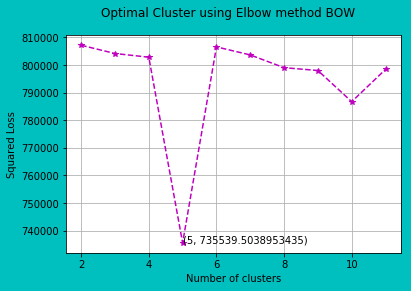

  0%|          | 0/10 [00:00<?, ?it/s]

************************************************************
Avgword2vec
************************************************************


100%|██████████| 10/10 [00:59<00:00,  5.96s/it]


The optimal number of clusters ==  7
The loss for optimal cluster is ==   22884.68465844303


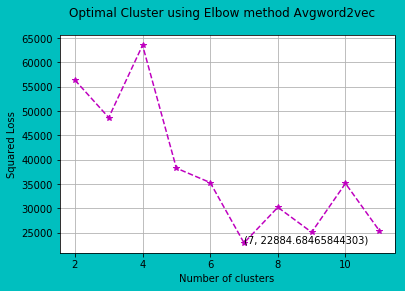

  0%|          | 0/10 [00:00<?, ?it/s]

************************************************************
TFIDF
************************************************************


100%|██████████| 10/10 [01:03<00:00,  6.33s/it]


The optimal number of clusters ==  8
The loss for optimal cluster is ==   495310.46030111786


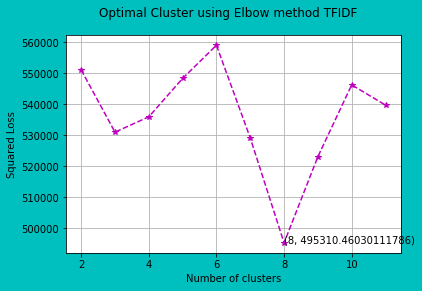

  0%|          | 0/10 [00:00<?, ?it/s]

************************************************************
TFIDFweightedword2vec
************************************************************


100%|██████████| 10/10 [00:57<00:00,  5.78s/it]


The optimal number of clusters ==  8
The loss for optimal cluster is ==   26002.167166959734


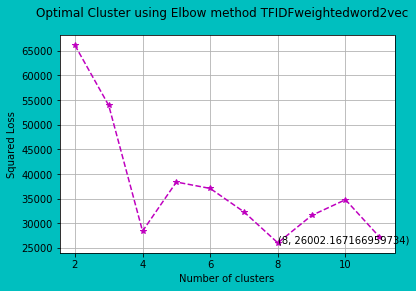

In [35]:
vect_name=['BOW','Avgword2vec','TFIDF','TFIDFweightedword2vec']

Optimal_cluster_vect=[]

for y in range(len(vect_name)):
            print("*" * 60)
            print(vect_name[y])
            print("*" * 60)
            Optimal_cluster_kmedoids(vect_result[y],D_results[y],vect_name[y])
            Optimal_cluster_vect.append(Optimal_cluster)
            
               

In [36]:
print(Optimal_cluster)

8


In [37]:
# Using optimal_cluster to best kmedoid.

M, C = kMedoids(D, k =  Optimal_cluster) 


In [38]:
# Training the best model

M_result=[]
C_result=[]
for i in tqdm(range(len(Optimal_cluster_vect))):
        M, C = kMedoids(D_results[i], k = Optimal_cluster_vect[i]) # Using optimal_cluster to best kmedoid.
       
        M_result.append(M)
        C_result.append(C)
        

100%|██████████| 4/4 [00:25<00:00,  6.28s/it]


#### "wordcloud_km" function for printing & displaying wordcloud

In [39]:
def  wordcloud_km(vect_no):
    
    random_cluster_k=random.randint(0, (Optimal_cluster-1))
    #print(random_cluster_k)
    counts=M_result[vect_no][random_cluster_k]
    print ("Cluster ",random_cluster_k)
    print (" ")
    text_data4=X_Text.iloc[counts]['CleanedText']
    print (text_data4)
    word_cloud_form(text_data4)
    print ("\nA Review belonging to this cluster. -> \n")
    C1=C_result[vect_no][random_cluster_k]
    #C1_count=[i for i in range(len(C1)) if C1[i]==counts][0]
    text_data41=X_Text.iloc[C1[0]]['CleanedText']

    print ( text_data41)
    word_cloud_form(text_data41)
    print ("\n")
    print ("*" * 90)


### Kmedoids algorithm using BOW 

Cluster  2
 
b'thrill gift hes italian superfast ship'


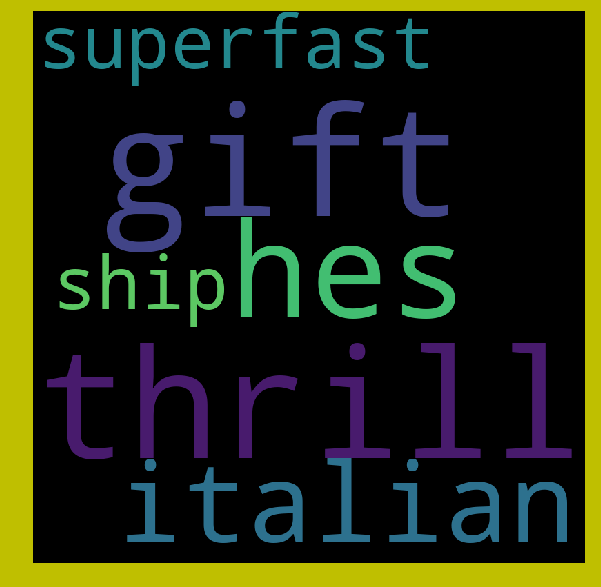


A Review belonging to this cluster. -> 

b'discov oil year ago bought one flavor thunderstruck qualiti use place veget oliv oil whenev dish call similar flavor ingredi give extra flavor found use spare sinc didnt know find theyr gone almost bottl bought open theyr fresh ever thrill see avail amazon lemon oil make wonder greek saganaki flame feta kaseri chees lime oil fantast thai cook mani dish orang oil use salmon marinad well orient chines may even tri make duck lorang dont recal paid initi purchas gourmet oil pricey begin would consid reason price especi consid amazon free ship conveni deliveri bottl also attract display tall slim take littl space counter treat oil'


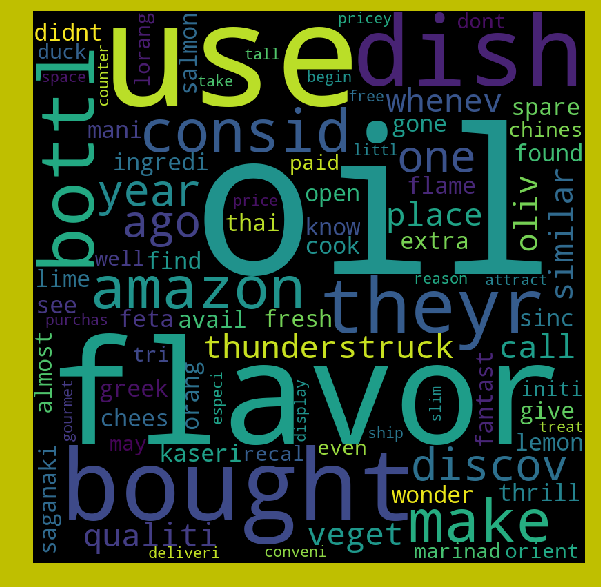



******************************************************************************************


In [49]:
wordcloud_km(0)

### Kmedoids algorithm using Avgword2vec

Cluster  0
 
b'stuff perfect camp trip your lazi cut tofu green onion mix proper miso past son love nice salti mani will open tub tofu cut half ounc stuff anyway perfect make conveni'


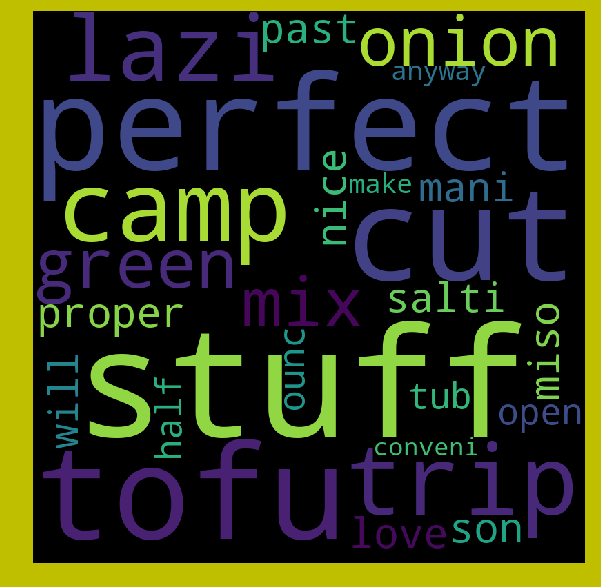


A Review belonging to this cluster. -> 

b'wine saver great mani way obvious wonder abl open bottl wine stay good day two especi like one glass dinner let open enjoy expens wine sinc wont wast whole rest bottl interest learn wine youll probabl want open wine time compar way wont wast anyth wine saver keep undrunk portion next time recommend put bottl fridg dont drink next day pull bottl hour want drink red'


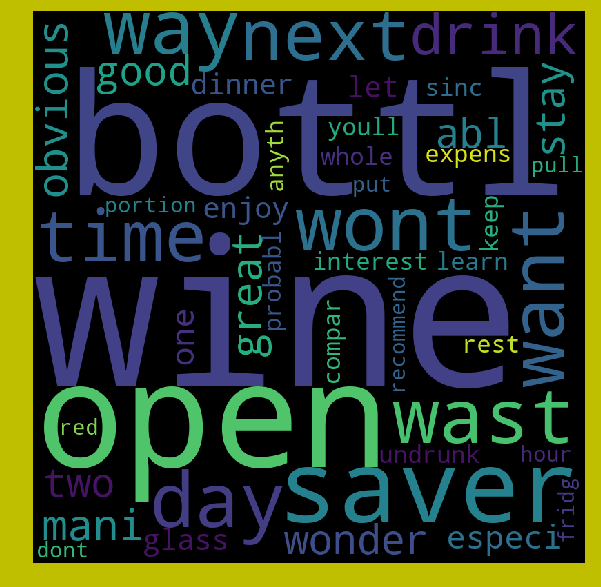



******************************************************************************************


In [50]:
wordcloud_km(1)

### Kmedoids algorithm using TFIDF

Cluster  2
 
b'tea good flavor power enjoy without sweeten'


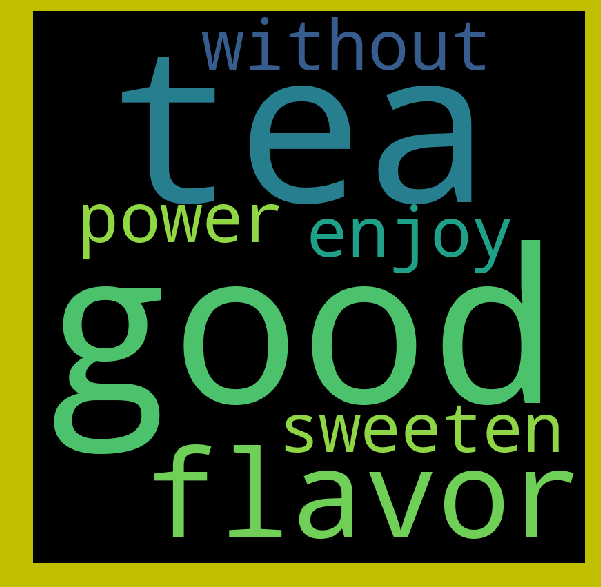


A Review belonging to this cluster. -> 

b'young near half centuri ago chuckl popular candi realli enjoy eat jelli treat dust granul sugar definit satisfi sweet tooth still enjoy occas though easi find old day wane somewhat popular particular favorit cherri flavor sold cherri pack would bought ton luckili cherri pack avail also enjoy licoric orang flavor lemon lime howev flavor like least would benevol offer younger sister heart day'


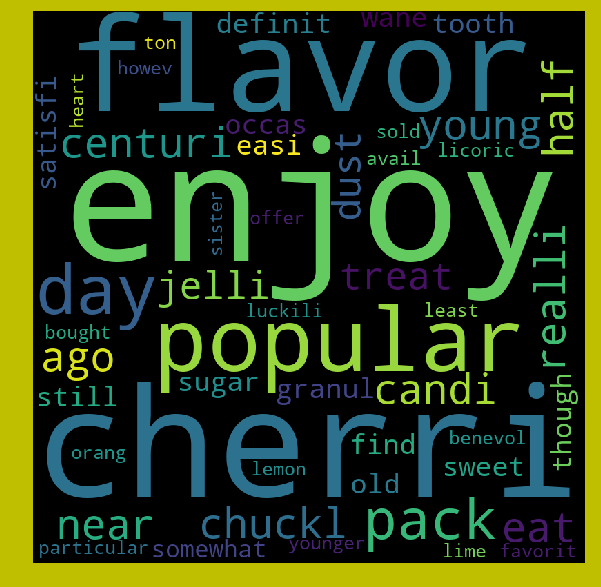



******************************************************************************************


In [51]:
wordcloud_km(2)

### Kmedoids algorithm using TFIDF weighted word2vec

Cluster  1
 
b'heard describ starter green tea one general sell point sweet floral flavor sit top away thing green tea drive first time user grassi flavor bitter aftertast like realli crazi tea moder amount though make nice altern tri new flavor actual blend favor keep much around pound get amazon probabl last coupl year drink cup tea day would recommend make sort weak approach real level tea strength jasmin flavor becom opposit cloy bitter mix well twine gunpowd green half half allow differ textur interest slight appropri starter blend allow natur tast green shine still clip leafi flavor back tongu best time drink seem relax moder day get someth natur breez absolut best bit aroma'


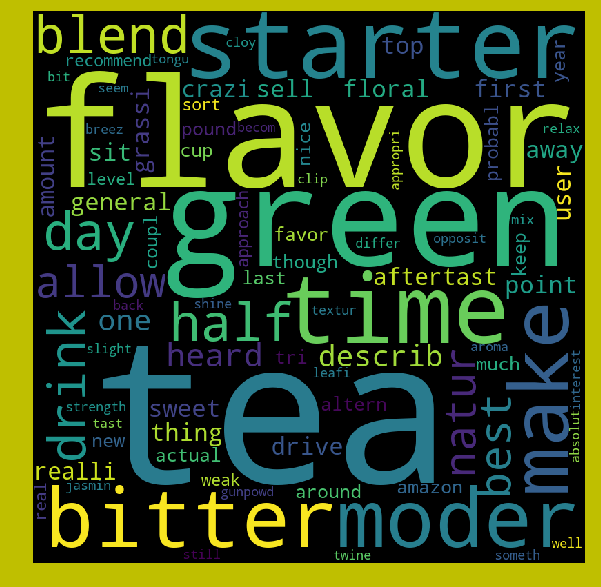


A Review belonging to this cluster. -> 

b'sick scad nasti toothpick counter tint concept one long overdu except welcom color vibrant offens tast blend opinion smooth wilton past youll need experi bit get hue right first well worth'


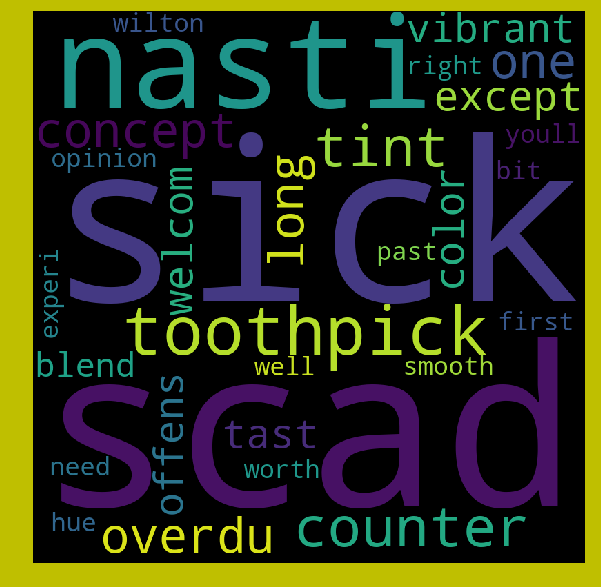



******************************************************************************************


In [52]:
wordcloud_km(3)

### Plots for  Number of points in each cluster with all vectorization method

counts for  BOW== [2505.0, 2297.0, 2424.0, 2405.0, 2577.0, 1766.0]


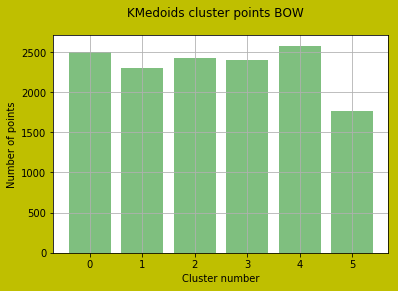

counts for  Avgword2vec== [2384.0, 2196.0, 2620.0, 2439.0, 2620.0, 2292.0, 2676.0, 2995.0, 2657.0, 1880.0]


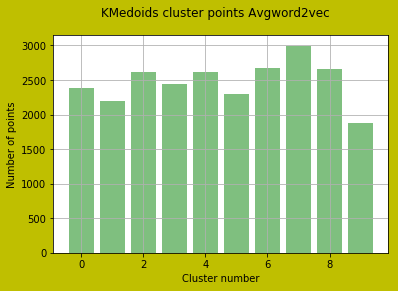

counts for  TFIDF== [1986.0, 2472.0, 2672.0, 2764.0, 2101.0, 2372.0, 2630.0, 2569.0, 2508.0]


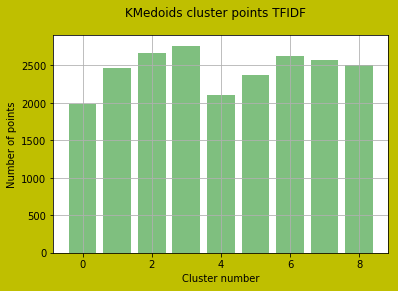

counts for  TFIDFweightedword2vec== [2664.0, 2362.0, 2283.0]


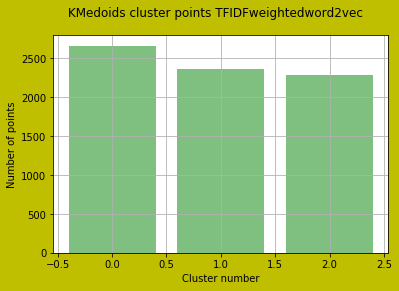

In [53]:

# Plotting Number of points in each cluster .
for i in range(len(Optimal_cluster_vect)):
    counts = []
    cc=C_result[i]
    #print(cc.items())
    for key, arr in cc.items():
        counts.append(round(arr.mean()))
    
  
    print("counts for  "+str(vect_name[i])+"==",counts)
    fig4 = plt.figure( facecolor='y', edgecolor='k')
    fig4.suptitle('KMedoids cluster points '+str(vect_name[i]), fontsize=12)    
    plt.bar([x for x in range(Optimal_cluster_vect[i])], counts,color='g', alpha = 0.5)
    plt.xlabel("Cluster number")
    plt.ylabel("Number of points")
    plt.grid()
    plt.show()
    
    
    

### Observations for kmedoids

* Optimal k values and it's graph is visualized .Optimal k values differed with each vectorization techniques
* Elbow graph looks different .

* A review  from sets belonging to particular cluster is displayed along with it's whole sets for particular cluster.
* Number of points with respect to cluster number is almost equally distributed  with all techniques as comapred to kmeans++ algorithm as seen in bar graph.

# 2.Hierarchical Clustering

In [40]:
# Checking agglomerative Clustering groupings ->
cluster_name=['cluster_BOW','cluster_Avgword2vec','cluster_tfidf','cluster_tfidfword2vec']
#cluster_optimal=
def agglomerative_Cluster(vectorization_output,cluster_name):    

    df = X_Text
    random_cluster=random.randint(0, (len(cluster_range)-3))
    #random_cluster=2
    #for cluster in tqdm(range(len(cluster_range))):
        
    agg = AgglomerativeClustering(n_clusters=cluster_range[random_cluster])
    agg.fit(vectorization_output)

    print("*" * 40, "  For Number of Clusters = ",random_cluster, "  ", "*" * 40)
    print("\nReviews for each of the clusters : \n")
    df = X_Text[:5000]
    df[cluster_name] = agg.labels_

    df = df.groupby([cluster_name])


    # Printing two reviews from each cluster, if they contain at-least points.
    for i in range(random_cluster):
        print("For cluster ", i, "\n")

        print("Review 1 -> \n")
        review_1=X_Text.loc[df.groups[i][0]]['CleanedText']
        print(review_1)
        word_cloud_form(review_1)



        if(len(df.groups[i]) > 1):

            print("\n")
            print("Review 2 ->  ,\n")
            review_2=X_Text.loc[df.groups[i][1]]['CleanedText']
            print(review_2)
            word_cloud_form(review_2)
        print("-" * 80)

    print("_" * 80)
    print("\n")

****************************************   For Number of Clusters =  7    ****************************************

Reviews for each of the clusters : 

For cluster  0 

Review 1 -> 

b'witti littl book make son laugh loud recit car drive along alway sing refrain hes learn whale india droop love new word book introduc silli classic book will bet son still abl recit memori colleg'


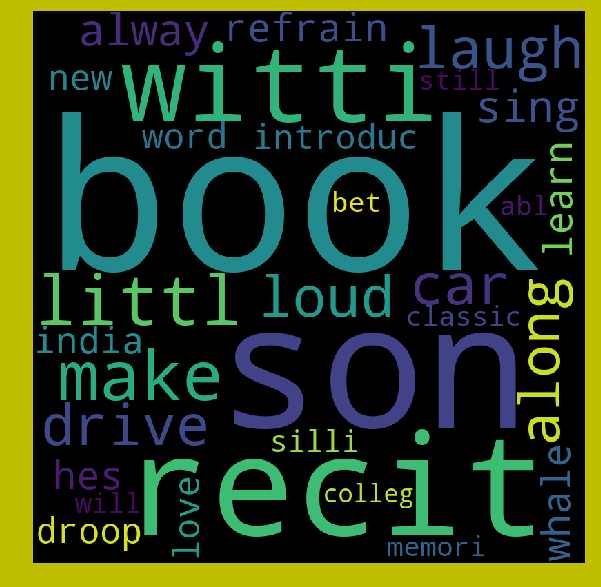



Review 2 ->  ,

b'rememb see show air televis year ago child sister later bought day thirti someth use seri book song student teach preschool turn whole school purchas along book children tradit live'


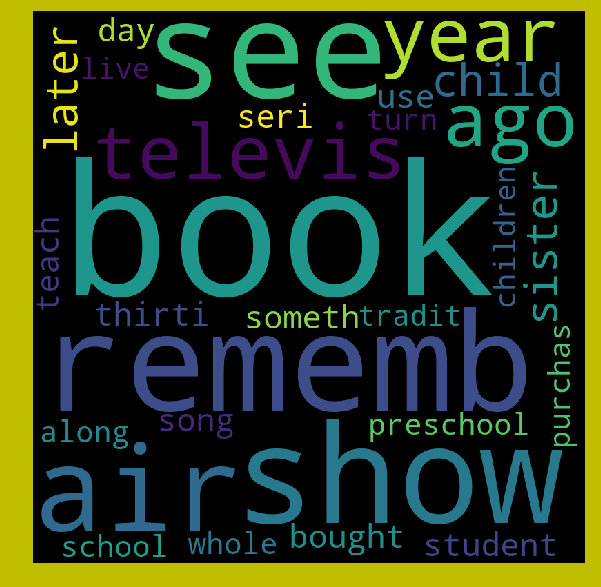

--------------------------------------------------------------------------------
For cluster  1 

Review 1 -> 

b'review written pill pocket cat amazon amazon sometim post review next greeni pill pocket unless greeni bought pill pocket cat reissu label mistak ive never tri greeni took origin review repost warn pocket cat soft hollow littl cat treat shape like cup concept simpl put pill open seal pinch close feed cat cat littl hesit first coupl time would put littl catfood gravi ador ate right sometim would get fussi eat main shes annoy spoil littl critter ive found dress dri bonito flake work realli well look forward daili treat would remind didnt get pocket first bag similar consist velveeta though second bag littl dri tend crumbl cat prefer pill pocket moist still eat drier one think product dri sit shelf buy product store oppos amazon shake bag rattl lot like piec loos product like dri crumbl lot cat dont recommend buy product larg quantiti bag open product tend start dri bag right 

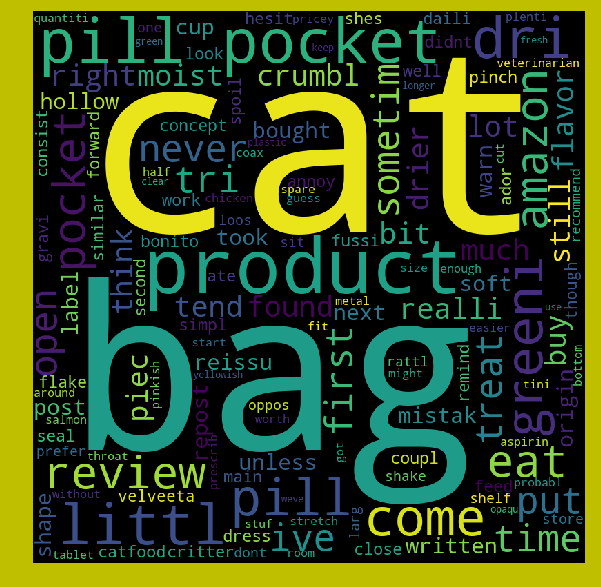



Review 2 ->  ,

b'cat diagnos asthma becam necessari pill daili feral first year life pill alway imposs especi sinc one help whole process thank pill pocket kept aliv asthma control without ad condit due stress common asthma trigger forc pill ive heard cat dont treat two boy gobbl pill sure would tri next hadnt work youv troubl pill youv run idea definit worth shot cours cat super smart know spit pill treat still great snack'


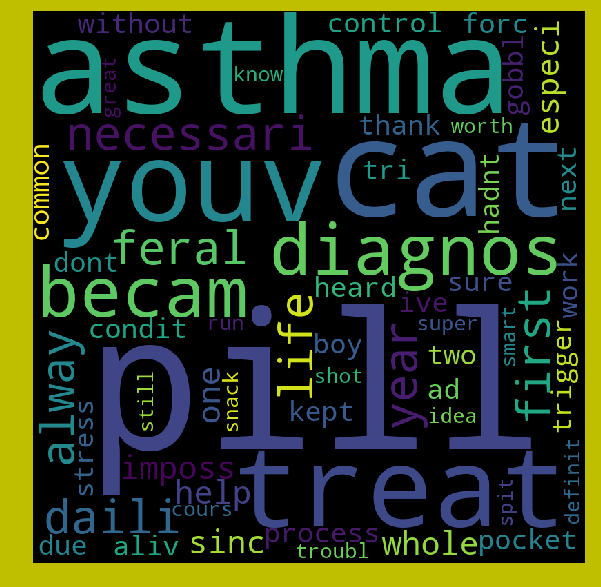

--------------------------------------------------------------------------------
For cluster  2 

Review 1 -> 

b'littl dream danger cure dream less dream dream time drink coffe chai tea mouth warm heat beverag take smallest bite orang napolitain sudden mouth fill exot flavor melt dark chocol bust flavor orang similar flavor candi orang peel flavor orang zest mysteri escap could describ silkiest dark chocol world indulg reveal culinari genius piec individu wrap beauti orang wrap display shield greek warrior leonida king sparta chocol actual name founder leonida kestekidi immigr unit state move belgium first tast leonida chocol brussel belgium sinc wonder could purchas delici chocol without fli belgium must say tast leonida pralin fill chocol rememb tast life sinc review amazon discov chocol gold box resembl box rememb belgium store sale locat worldwid offer varieti fresh chocol chocol air freight week brussel alway find qualiti superior chocol arriv fast fresh purchas belgium care pack

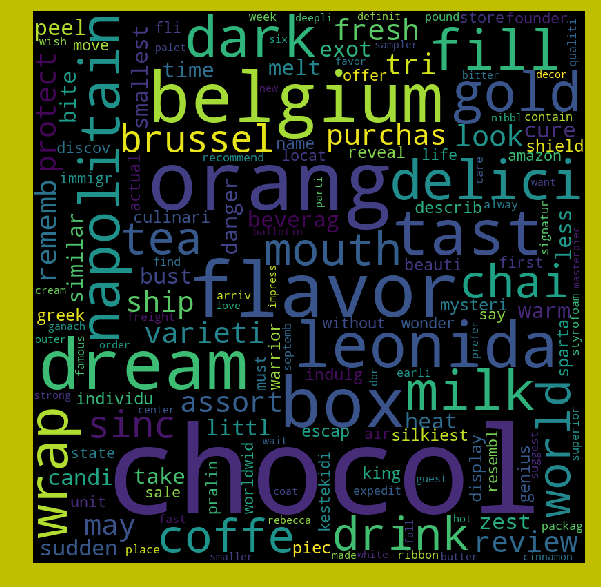



Review 2 ->  ,

b'possibl fall mad love box chocol assort perfect place start adventur chocol name leonida kestekidi definit knew creat chocol true chocol connoisseur move back belgium marri true love creat chocol world ador tast chocol tast bud also final know true chocol happi whether tri one cup coffe tea enjoy one daili indulg impress love give zest life love chocol dreami lemon fill embodi sentiment chocol uniqu design love chocol two heart ribbon seal sampl varieti chocol specif flavor stand favorit favorit creami fill ganach butter cream come dark white milk chocol depend select dark order box smooth brandi flavor lait absolut delici vanilla flavor fresh butter cream fill time definit stop tast chocol dark chocol strawberri sauc ever love coffe may one delici milk dark chocol chocol ever made fill special coffe cream hint caramel order entir box come varieti flavor milk chocol cherri fill like claud debussi r\xc3\xaaveri difficult describ besid say like delic cherri ice wrap m

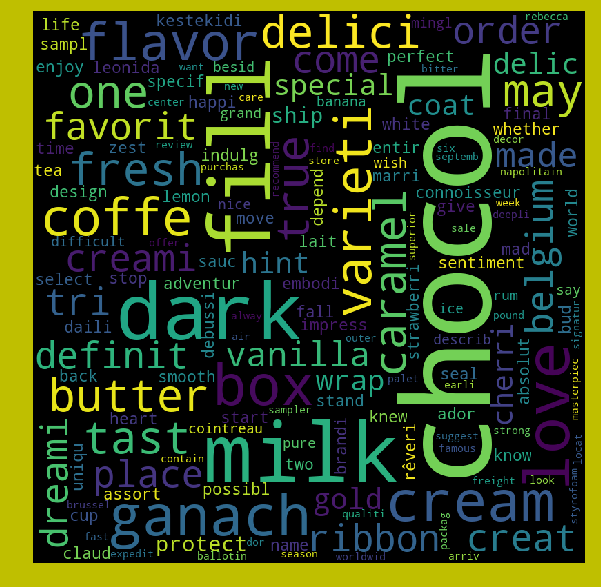

--------------------------------------------------------------------------------
For cluster  3 

Review 1 -> 

b'use believ stone mill machineri yet develop grind grain flour cereal meal quit well quartz stone use master miller sinc earli roman time red mill stone ground whole wheat flour favorit flour use varieti whole wheat bread recip natur doesnt contain preserv use flour bread machin bake produc superior result ive use recip back bag adapt use mixtur whole wheat regular bread flour didnt gluten call recip substitut cup regular bread flour part whole wheat flour dont seem need gluten red mill product remind childhood father took graue mill oakbrook watch corn mill oper waterwheel gristmil illinoi bob red mill product dont arriv cloth bag paper bag old fashion feel closur love crink sound paper bag red mill use slow turn millston natur grind togeth bran endosperm germ contain nutriti oil cool stone grind process preserv nutrient normal lost mill compani produc product look everyth 

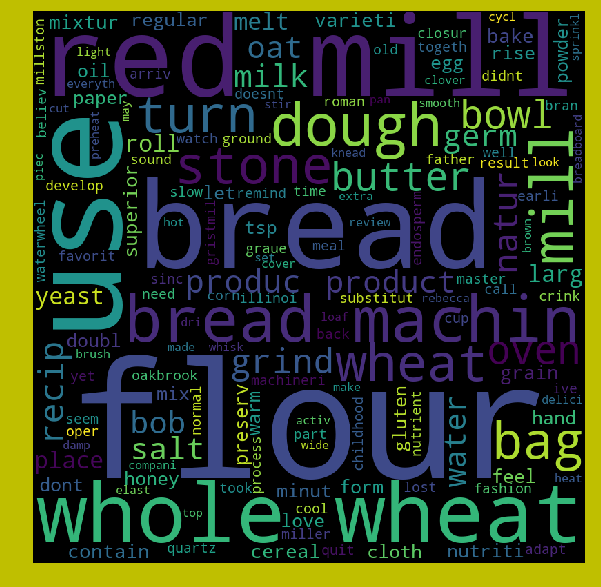



Review 2 ->  ,

b'use believ stone mill machineri yet develop grind grain flour cereal meal quit well quartz stone use master miller sinc earli roman time red mill stone ground whole wheat flour favorit flour use varieti whole wheat bread recip natur doesnt contain preserv use flour bread machin bake produc superior result ive use recip back bag adapt use mixtur whole wheat regular bread flour didnt gluten call recip substitut cup regular bread flour part whole wheat flour dont seem need gluten red mill product remind childhood father took graue mill oakbrook watch corn mill oper waterwheel gristmil illinoi bob red mill product dont arriv cloth bag paper bag old fashion feel closur love crink sound paper bag red mill use slow turn millston natur grind togeth bran endosperm germ contain nutriti oil cool stone grind process preserv nutrient normal lost mill compani produc product look everyth hot cereal mix flour mill wide varieti grain love make natur bread bread machin flour superior

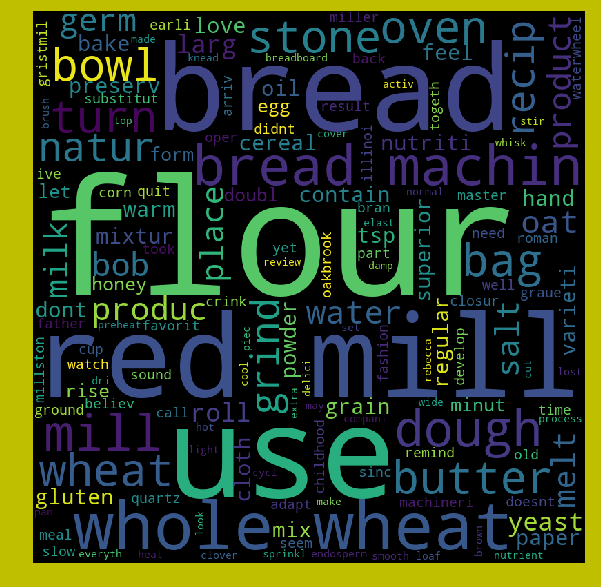

--------------------------------------------------------------------------------
For cluster  4 

Review 1 -> 

b'coffe great senseo machin difficult use far get pod correct sure happen peopl report steam lock issu pod insert pod holder seat correct within pod prepar insert issu vari basic consist hot water come side coffe maker coffe would brew pod would discard happen senseo pod probabl would happen aloha island pod except learn deal machin case lid coffe maker would stuck possibl dread steam lock alway abl open machin minut wiggl lock releas handl machin would think peopl would automat machin doesnt open proper prepar pod insert abl use singl pod melitta one senseo well aloha island pod cours senseo pod dont put right problem key spread coffe equal around within pod insert machin wiggl pod around bit take second help instruct aloha island pod say break coffe within pod use effect took five month figur use senseo pod especi brew two cup wish senseo would includ littl note like aloha 

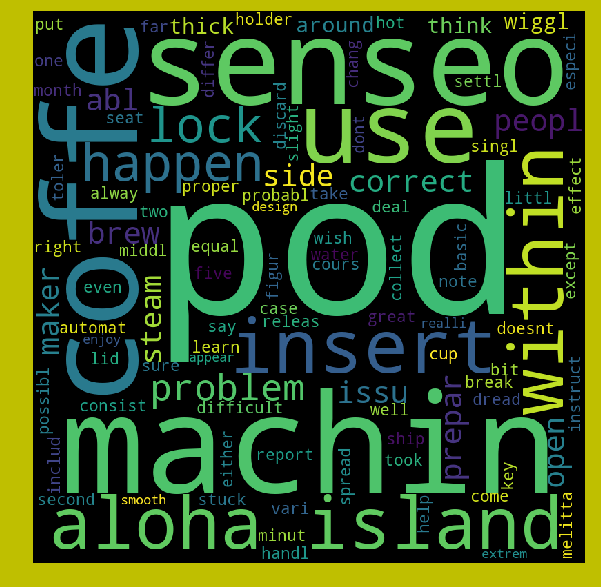



Review 2 ->  ,

b'realli like senseo coffe maker like other review kona pod alway search better tast coffe pod use machin excit see kona made pod also happi see pod cup style found huge deal use smaller cup size pod sound nice abl put one larg pod machin instead smaller one read review could figur review meant kona pod make differ amount coffe per cup time coffe could strang undrink didnt make sens well still doesnt make sens certain happen coffe made use kona pod also result overal poor disappoint kona pod cost lot folger pod brand buy local first thing notic coffe cup size kona pod pack much tight pod ever use senseo instruct kona pod say wiggl pod break coffe insert machin kona pod feel hard taken packag alway wiggl jiggl pod second put senseo problem kona pod husband decid wiggl enough prompt wiggl one point broke open much done pod put machin first thing notic amount coffe brew use kona pod quit bit less use smaller pod make much sens sever cup kona obvious never amount coffe co

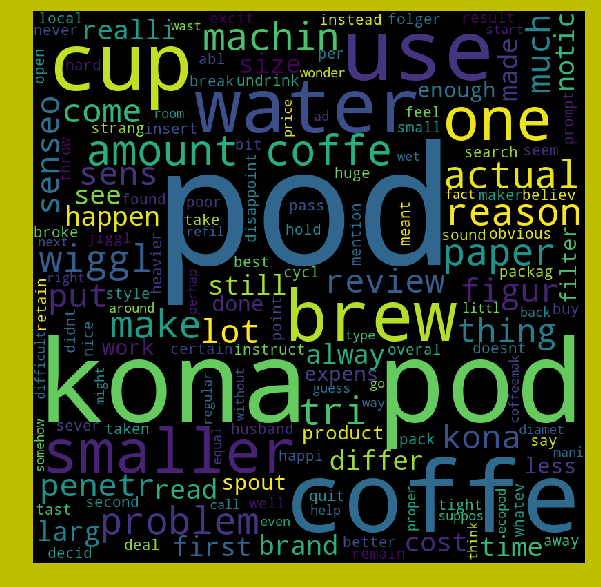

--------------------------------------------------------------------------------
For cluster  5 

Review 1 -> 

b'unfortun peopl ill inform vegan cat includ veterinarian cat fact oblig carnivor howev domest hous cat bring home effect remov cat natur prey mice insect bird lizard small creatur past year human food industri search way salvag use wast materi process line came upon wonder solut let boil dri add food make cat dog result vast major commerci pet food contain euphemist refer four dead die disabl diseas anim along quit undesir materi quit frank feed junk pet effect poison see diseas pet today never seen wide varieti contamin ingredi find way food feed companion anim know garbag garbag issu provid essenti amino acid build block protein vitamin miner particular uniqu physiolog felid cat qualiti quantiti avail nutrient come sourc vegan best sourc veget base thousand perhap hundr thousand cat around world live quit well one sever avail vegan cat food recogn nutrit complet person yea

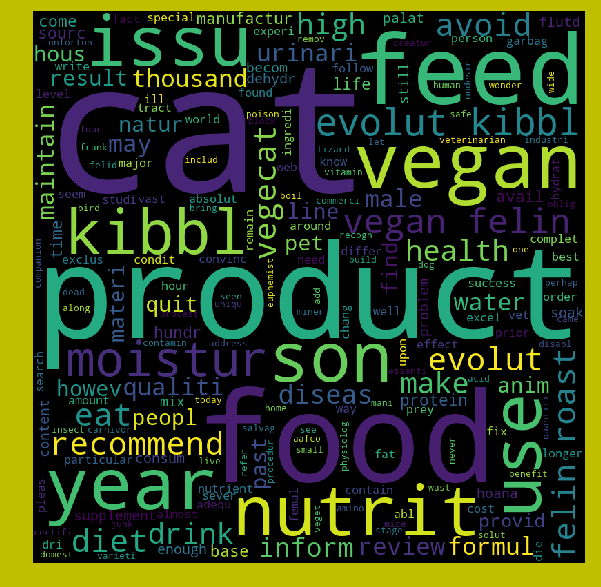

--------------------------------------------------------------------------------
For cluster  6 

Review 1 -> 

b'rees candi compani first began manufactur product made special process peanut butter hershey milk chocol back product simpli known peanut butter cup today popular candi known rees peanut butter cup harri burnett rees actual former dairi employe milton hershey founder hershey food corpor inspir exampl went make fortun candi industri rees made lot product johnni bar molass lizzi bar coconut candi end fortun made singl product offer simpl combin peanut butter chocol factori locat street hershey rees began sell peanut butter cup box use candi assort ad cup origin sold penni world war rees discontinu product made peanut butter cup distribut wholesal jobber vend machin oper syndic store world war peanut butter cup familiar orang yellow brown wrap continu gain nation popular rees candi compani inc sold million hershey chocol compani first variat rees peanut butter cup made introdu

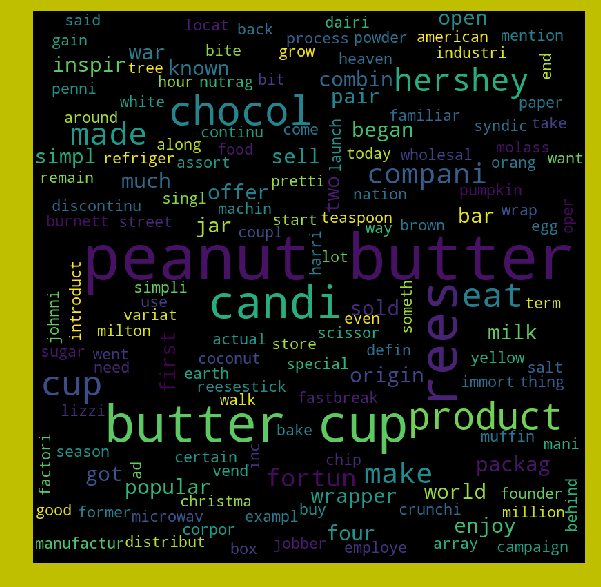



Review 2 ->  ,

b'rees candi compani first began manufactur product made special process peanut butter hershey milk chocol back product simpli known peanut butter cup today popular candi known rees peanut butter cup harri burnett rees actual former dairi employe milton hershey founder hershey food corpor inspir exampl went make fortun candi industri rees made lot product johnni bar molass lizzi bar coconut candi end fortun made singl product offer simpl combin peanut butter chocol factori locat street hershey rees began sell peanut butter cup box use candi assort ad cup origin sold penni world war rees discontinu product made peanut butter cup distribut wholesal jobber vend machin oper syndic store world war peanut butter cup familiar orang yellow brown wrap continu gain nation popular rees candi compani inc sold million hershey chocol compani first variat rees peanut butter cup made introduct rees crunchi peanut butter cup rees start sell peanut butter jar offer rees bit bake compan

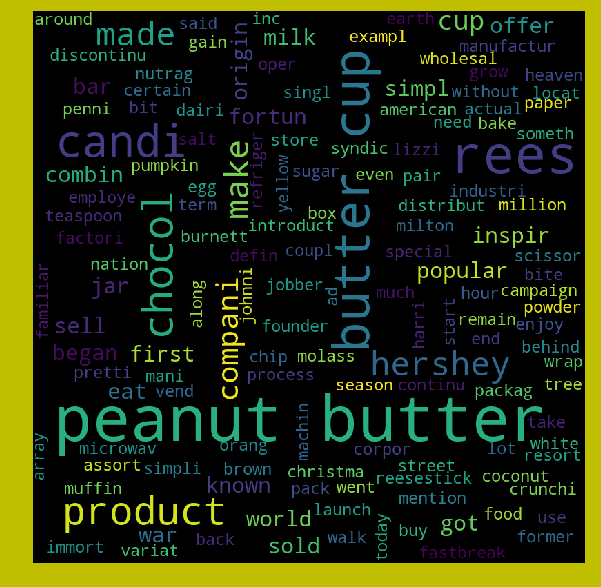

--------------------------------------------------------------------------------
________________________________________________________________________________




In [41]:
agglomerative_Cluster(vectorization_output[0],cluster_name[0])

****************************************   For Number of Clusters =  4    ****************************************

Reviews for each of the clusters : 

For cluster  0 

Review 1 -> 

b'witti littl book make son laugh loud recit car drive along alway sing refrain hes learn whale india droop love new word book introduc silli classic book will bet son still abl recit memori colleg'


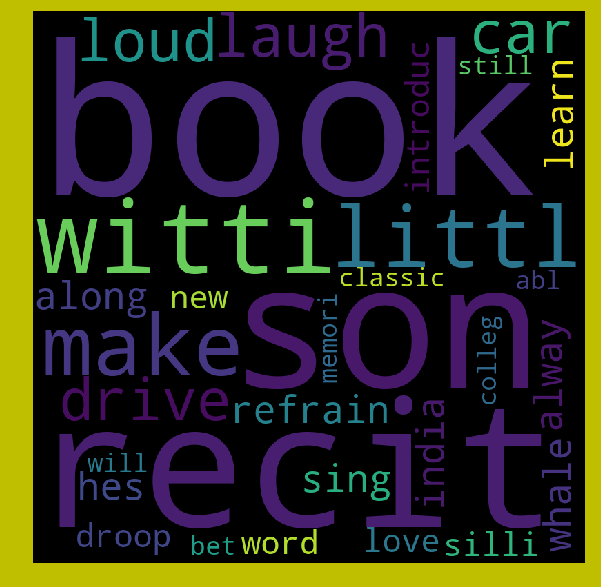



Review 2 ->  ,

b'rememb see show air televis year ago child sister later bought day thirti someth use seri book song student teach preschool turn whole school purchas along book children tradit live'


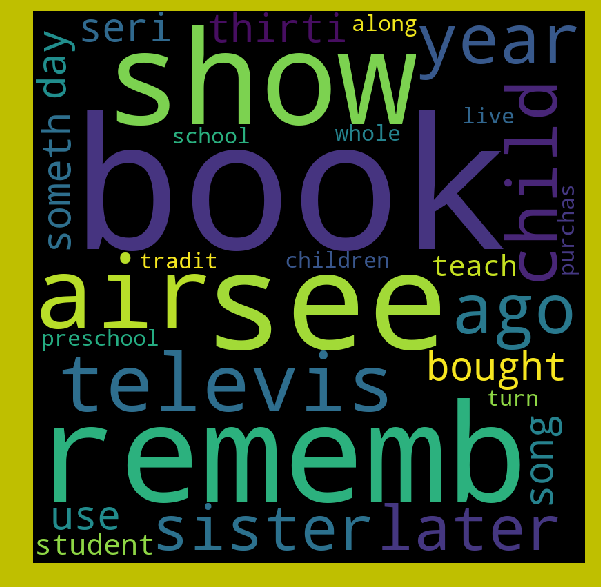

--------------------------------------------------------------------------------
For cluster  1 

Review 1 -> 

b'kid ice cream favorit treat ive told highest milk fat content ice cream around man tast stuff amaz fan premium ice cream best stuff'


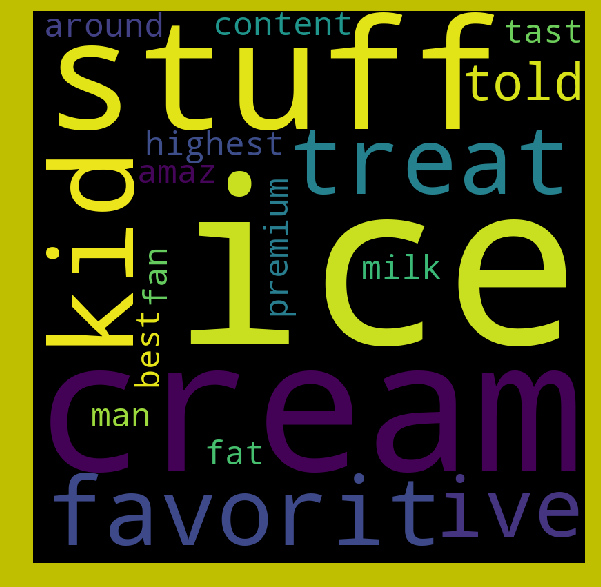



Review 2 ->  ,

b'love stuff doesnt rot gum tast good go buy gum get'


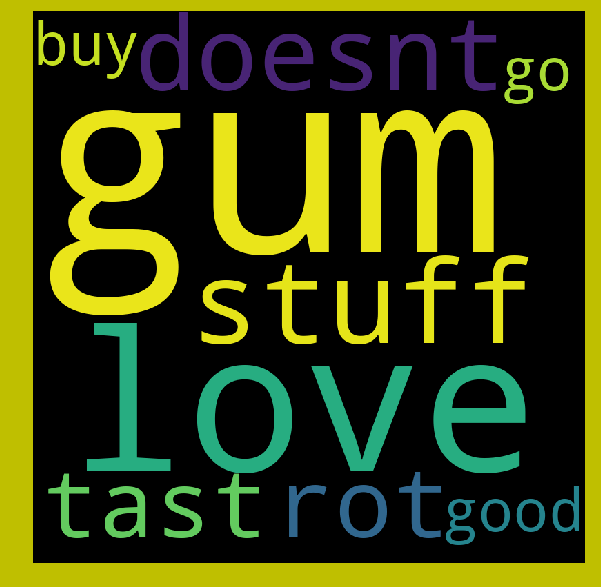

--------------------------------------------------------------------------------
For cluster  2 

Review 1 -> 

b'food color kit sound great except give ounc size bottl what would nice know much product get dollar'


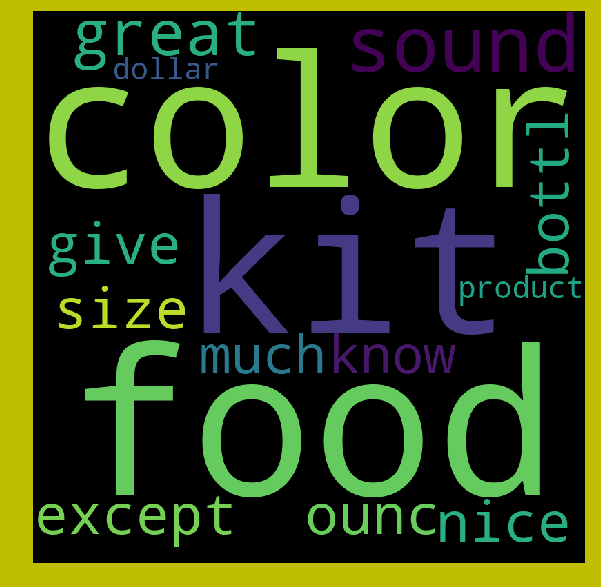



Review 2 ->  ,

b'return due short brief expir date sept would less use pod amazon pull shelv'


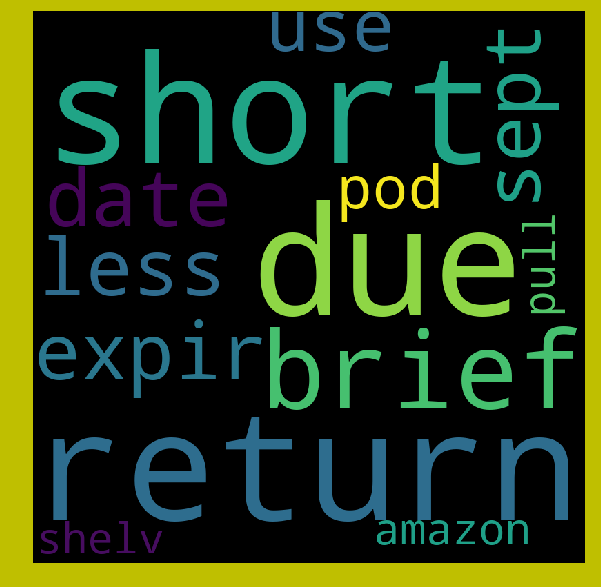

--------------------------------------------------------------------------------
For cluster  3 

Review 1 -> 

b'get crazi realli imposs today find french vhs version film pleas tell someth tks'


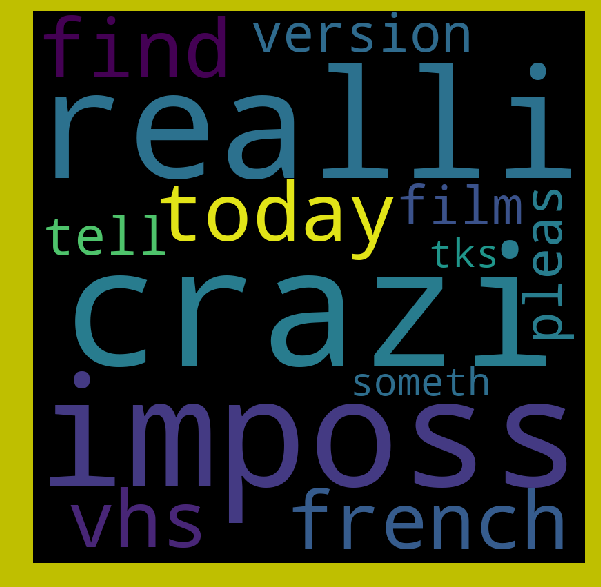



Review 2 ->  ,

b'get crazi look beatlejuic french version video realli imposs today find french vhs version film pleas tell someth tks'


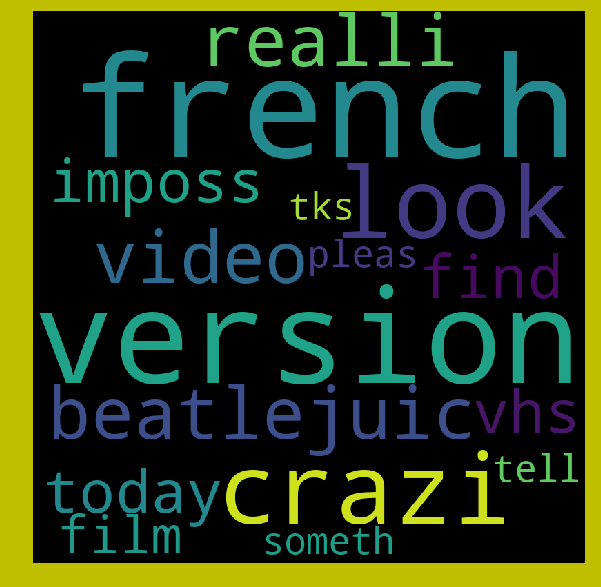

--------------------------------------------------------------------------------
________________________________________________________________________________




In [56]:
agglomerative_Cluster(vectorization_output[1],cluster_name[1])

In [40]:
 # This code cell is for agglomerative  using Tf-IDf
agglomerative_Cluster(vectorization_output[2],cluster_name[2])

In [41]:
# This code cell is for agglomerative  usinf tf-idf weighted word2vec
agglomerative_Cluster(vectorization_output[3],cluster_name[3])


## Observation for Hierarchical clustering using agglomerative method

* In Agglomerative Clustering, Random Cluster number is selected and then How agglomerative cluster is clustered from cluster 0 to random cluster number is shown. 
* Wordcloud visualized each cluster review as seen in above. 

* here,Hierarchical clustering is using the types named as agglomerative hierarchical clustering.
* As in agglomerative methods,group of cluster is clustered based on similarity or distance between clusters.
* As above with each featurization techniques, 5k reviews are clustered with agglomerative method.
* we can see the similarity between  review1 and review2 for particular sets(contains reviews) in given cluster.


# DBSCAN(Density Based spital clustering of application with noise)

In [42]:
# Computing 200th Nearest neighbour distance code.
minPts = 2 * 100
# Lower bound function copied from -> https://gist.github.com/m00nlight/0f9306b4d4e61ba0195f
def lower_bound(nums, target): # This function return the number in the array just greater than or equal to itself.
    l, r = 0, len(nums) - 1
    while l <= r: # Binary searching.
        mid = int(l + (r - l) / 2)
        if nums[mid] >= target:
            r = mid - 1
        else:
            l = mid + 1
    return l

def compute200_nearest_neighbour(x, data): # Returns the distance of 200th nearest neighbour.
    dists = []
    for val in data:
        dist = np.sum((x - val) **2 ) # computing distances.
        if(len(dists) == 200 and dists[199] > dist): # If distance is larger than current largest distance found.
            l = int(lower_bound(dists, dist)) # Using the lower bound function to get the right position.
            if l < 200 and l >= 0 and dists[l] > dist:
                dists[l] = dist
        else:
            dists.append(dist)
            dists.sort()
    
    return dists[199] # Dist 199 contains the distance of 200th nearest neighbour.

## Computing the 200th Nearest Neighbour Distance of points in the dataset

In [78]:
# Computing the 200th nearest neighbour distance of some point the dataset:
neigh200 = []
for val in vectorization_output[1]:
    neigh200.append( compute200_nearest_neighbour(val, vectorization_output[1]) )
neigh200.sort()

### Plotting for the Elbow Method

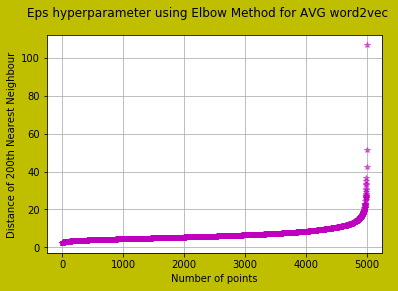

In [79]:

fig4 = plt.figure( facecolor='y', edgecolor='k')
fig4.suptitle('Eps hyperparameter using Elbow Method for AVG word2vec ', fontsize=12)    
plt.plot([x for x in range(len(neigh200 ))], neigh200 ,'m*', alpha = 0.5)
plt.xlabel("Number of points")
plt.ylabel("Distance of 200th Nearest Neighbour")
plt.grid()
plt.show()

The Knee point seems to be 18. So Eps = 18

In [43]:
# Training DBSCAN :
model = DBSCAN(eps = 18, min_samples = minPts, n_jobs=-1)
model.fit(vectorization_output[1])


DBSCAN(algorithm='auto', eps=18, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=200, n_jobs=-1, p=None)

In [44]:
df1 =X1[:5000]

#word_cloud_form(df1['CleanedText'][0])
df1['AVG-W2V_Label'] = model.labels_
df1.head(2)

CleanedText  AVG-W2V_Label
150523  b'witti littl book make son laugh loud recit c...              0
150500  b'rememb see show air televis year ago child s...              0

In [45]:
df1.groupby(['AVG-W2V_Label'])['CleanedText'].count()

AVG-W2V_Label
0    5000
Name: CleanedText, dtype: int64

All Cluster labels for each point in the dataset given to fit()(model).No noise point is lied within cluster at eps=18 and min_samples=200.

### For different values of eps

#### Let's check the clustering with different values of eps  with minpts=200

In [46]:
diff_eps=[0.6,0.8,1,6,8,12,15,18,20]

In [47]:

for eps_val in range(len(diff_eps)):
    
    model = DBSCAN(eps =diff_eps[eps_val], min_samples = minPts, n_jobs=-1)
    model.fit(vectorization_output[1])
    print ("\n")
    print ("*" * 70)
    print("for eps value ===",diff_eps[eps_val])
    df1 =X1[:5000]
    df1['AVG-W2V_Label'] = model.labels_
    df2=df1.groupby(['AVG-W2V_Label'])['CleanedText'].count()
   
    print(df2)



**********************************************************************
for eps value === 0.6
AVG-W2V_Label
-1    5000
Name: CleanedText, dtype: int64


**********************************************************************
for eps value === 0.8
AVG-W2V_Label
-1    5000
Name: CleanedText, dtype: int64


**********************************************************************
for eps value === 1
AVG-W2V_Label
-1    5000
Name: CleanedText, dtype: int64


**********************************************************************
for eps value === 6
AVG-W2V_Label
-1       1
 0    4999
Name: CleanedText, dtype: int64


**********************************************************************
for eps value === 8
AVG-W2V_Label
-1       1
 0    4999
Name: CleanedText, dtype: int64


**********************************************************************
for eps value === 12
AVG-W2V_Label
0    5000
Name: CleanedText, dtype: int64


**********************************************************************
f

#### Noisy samples are given the label -1 in a cluster.

* eps value lies in this range  [0.6,0.8,1] is showing all samples points are noise point.
* For eps value [6,8], one point is noise point and rest of point is cluster point

* eps value lies between [12,15,18,20] is labelling all points as cluster point

## Computing the 200th Nearest Neighbour Distance of points in the dataset

In [80]:
# Computing the 200th nearest neighbour distance of some point the dataset:
neigh200_tf = []
for val in vectorization_output[3]:
    neigh200_tf.append( compute200_nearest_neighbour(val, vectorization_output[3]) )
neigh200_tf.sort()

### Plotting for the Elbow Method

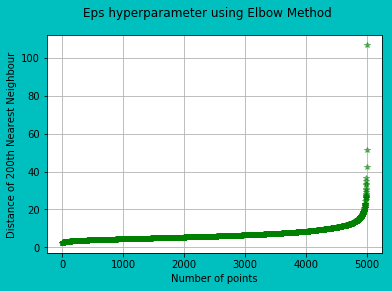

In [81]:

fig4 = plt.figure( facecolor='c', edgecolor='k')
fig4.suptitle('Eps hyperparameter using Elbow Method ', fontsize=12)    
plt.plot([x for x in range(len(neigh200_tf ))], neigh200_tf ,'g*', alpha = 0.5)
plt.xlabel("Number of points")
plt.ylabel("Distance of 200th Nearest Neighbour")
plt.grid()
plt.show()

In [48]:
# Training DBSCAN :
model = DBSCAN(eps = 20, min_samples = minPts, n_jobs=-1)
model.fit(vectorization_output[3])

DBSCAN(algorithm='auto', eps=20, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=200, n_jobs=-1, p=None)

In [49]:

df1['TFIDF-W2V_Label'] = model.labels_
df1.head(2)

CleanedText  AVG-W2V_Label  \
150523  b'witti littl book make son laugh loud recit c...              0   
150500  b'rememb see show air televis year ago child s...              0   

        TFIDF-W2V_Label  
150523                0  
150500                0

All Cluster labels for each point in the dataset given to fit()(model).No noise point is lied within cluster at eps=20 and min_samples=200.

In [50]:
df1.groupby(['TFIDF-W2V_Label'])['CleanedText'].count()

TFIDF-W2V_Label
0    5000
Name: CleanedText, dtype: int64

In [51]:
for eps_val in range(len(diff_eps)):
    
    model = DBSCAN(eps =diff_eps[eps_val], min_samples = minPts, n_jobs=-1)
    model.fit(vectorization_output[3])
    print ("\n")
    print ("*" * 70)
    print("for eps value ===",diff_eps[eps_val])
    df1 =X1[:5000]
    df1['TFIDF-W2V_Label'] = model.labels_
    #df2=df.groupby(['AVG-W2V_Label'])['CleanedText'].count()
    df2=df1.groupby(['TFIDF-W2V_Label'])['CleanedText'].count()
   
    print(df2)



**********************************************************************
for eps value === 0.6
TFIDF-W2V_Label
-1    5000
Name: CleanedText, dtype: int64


**********************************************************************
for eps value === 0.8
TFIDF-W2V_Label
-1    5000
Name: CleanedText, dtype: int64


**********************************************************************
for eps value === 1
TFIDF-W2V_Label
-1    5000
Name: CleanedText, dtype: int64


**********************************************************************
for eps value === 6
TFIDF-W2V_Label
-1       1
 0    4999
Name: CleanedText, dtype: int64


**********************************************************************
for eps value === 8
TFIDF-W2V_Label
-1       1
 0    4999
Name: CleanedText, dtype: int64


**********************************************************************
for eps value === 12
TFIDF-W2V_Label
0    5000
Name: CleanedText, dtype: int64


************************************************************

#### Noisy samples are given the label -1 in a cluster.

* eps value lies in this range  [0.6,0.81] is showing all samples points are noise point.
* eps value=[6,8] are labelling 1 ponit as noise points and rest of the point as a cluster points.

* eps value lies between [12,15,18,20] is labelling all points as cluster point

#### It can be observed that DBSCAN is sensitive to eps

#### Observations:


* Clustering techniques labelling varies based on size, density and globular shape.
* With Kmeans++, kmedoids,Hierarchical clustering(agglomerative clustering) and DBSCAN clustering  on amazon reviews clustered the reviews as seen above.
